1. Uji Beda (t-test) terhadap 2 kelompok yang berhubungan
2. Uji beda (t-test) teradap 2 kelompok independent 
3. Uji beda lebih dari 2 kelompok

keduanya akan dilakukan secara parameterik dan nonparametrik

# UJI BEDA YANG BERHUBUNGAN

In [1]:
# import library

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

Diketahui nilai mahasiswa saat belajar offline dan online sebagai berikut ( skala 10)

- offline = [10, 9, 7, 8, 9, 9, 8,7,7,7,8,8,9,8,8,8,8,9]
- online =[8,8,7,7,6,7,7,7,7,6,6,6,6,7,8,7,8,7,8]

In [2]:
offline = np.array( [10, 9, 7, 8, 9, 9, 8,7,7,7,8,8,9,8,8,8,8,9 ] )
online = np.array( [8,8,7,7,6,7,7,7,7,6,6,6,6,7,8,7,8,7]  )

Uji Normalitas

Ho =  Data berdistribusi normal

Ha = data tidak berdistribusi normal

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

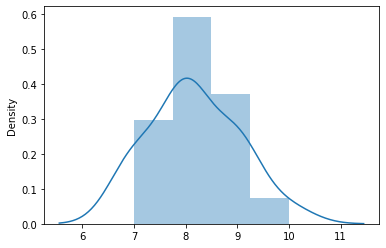

In [3]:
# Dengan Histogram saat pembelajaran offline
sns.distplot(offline)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

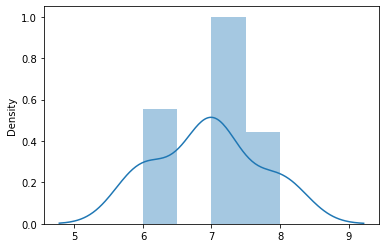

In [4]:
# Dengan Histogram saat pembelajaran online
sns.distplot(online)

Berdasarkan histogram, data berbentuk seperti lonceng dengan rata-rata pas ditengah. 

Sehingga, bisa kita simpulkan data brerdistribusi normal 

In [5]:
#UJI KOLMOGORV-SMIRNOV -> MENENTUKAN APAKAH DATA INI BERDISTRIBUSI NORMAL ATAU TIDAK

z_score_offline = stats.zscore(offline)
z_score_online = stats.zscore(online)

In [6]:
print("Stats of data offline ", stats.kstest(z_score_offline, "norm"))
print("Stats of data online ", stats.kstest(z_score_online, "norm"))

Stats of data offline  KstestResult(statistic=0.2459263761057694, pvalue=0.19142739197431258)
Stats of data online  KstestResult(statistic=0.2536307611137536, pvalue=0.1654350690223324)


Jika p-value > 0.05, maka Ho Diterima, data berdistribusi normal

jika maka sebaliknya

#Paired Sample - Test (Paramterik)

Ho = Tidak ada perbedaan yang signifikan

ha = Ada perbedaan

In [7]:
len(online)

18

In [8]:
t_value = stats.ttest_rel(offline, online)

print('Hasil uji t : ', t_value)

Hasil uji t :  Ttest_relResult(statistic=5.168586432893013, pvalue=7.712581804965841e-05)


karena p-value 5.16 * 10^-7 < 0.05, maka Ho ditolak

Terdapat perbedaan yang signifikan antara nilai mahasiswa saat belajar online dan saat belajar offline.


#Uji Wilcoxon (non paramterik)

Misalkan datatanya tidak berdistribusi normal, uji beda 2 kelompok berhubungan dapata dilakukan dengan uji wilcoxon

In [9]:
d = offline - online
stats.wilcoxon(d)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=0.0, pvalue=0.001213926677376025)

karena p-value  < 0.05, maka Ho ditolak

Terdapat perbedaan yang signifikan antara nilai mahasiswa saat belajar online dan saat belajar offline.


# UJI 2 BEDA INDEPENDENT

misalkan seorang CEO kafe ingien mengetahui apakah ada perbedaan antraana jumlah pengunjung kafe di wilayah A dan B selama 2 minggu terakhir.

In [10]:
A = np.array([27,29,27,32,34,38,39,27,30,32,34,36,38,40])
B = np.array([28,30,29,35,34,37,39,28,30,32,33,35,39,39])

Uji Normalitas

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

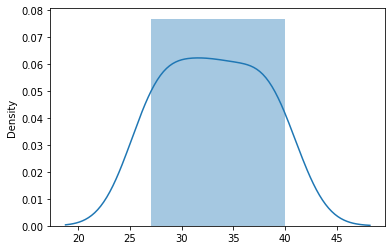

In [11]:
# Dengan Histogram saat pembelajaran offline
sns.distplot(A)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

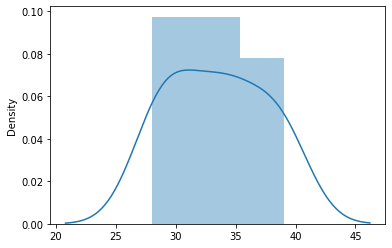

In [12]:
# Dengan Histogram saat pembelajaran offline
sns.distplot(B)

In [13]:
#UJI KOLMOGORV-SMIRNOV -> MENENTUKAN APAKAH DATA INI BERDISTRIBUSI NORMAL ATAU TIDAK

z_score_A = stats.zscore(A)
z_score_B = stats.zscore(B)

In [14]:
print("Stats of data offline ", stats.kstest(z_score_A, "norm"))
print("Stats of data online ", stats.kstest(z_score_B, "norm"))

Stats of data offline  KstestResult(statistic=0.15010032999139777, pvalue=0.8656406959340622)
Stats of data online  KstestResult(statistic=0.16609147661220497, pvalue=0.7771854894576767)


Apakah keduanya berdistribusi normal ? YA, gambar histogram seperti lonceng dan kedua p-value > 0.05

In [15]:
#UJI T
t_value = stats.ttest_rel(A, B)

print('Hasil uji t : ', t_value)

Hasil uji t :  Ttest_relResult(statistic=-1.099171705722864, pvalue=0.29163277086873024)


karena nilai p-value 0.29 > 0.05, artinya Ho Diterima yaitu tidak ada perbedaan yang signifikan antara jumlah pengunjung kafe di wilayah A dan B

Uji Mann-Whitney

Misalkan datanya tidak berdistribusi normal, uji beda 2 kelompok independent dapat dilakukan dengan uji mann-whitney

In [16]:
stats.mannwhitneyu(A,B)

MannwhitneyuResult(statistic=91.0, pvalue=0.7642583560538347)

# Uji Beda lebih dari kelompok

Dalam statistik paramterik (ANOVA), memiliki 2 asumsi:
1. Data berdistribusi normla
2. Varians data homogen


Kasus

Misalkan saat ini kamu adalah mentri pendidikan yang ingin mengetahui apakah kualitas pendidikan di negara sudah merata atau belum. 

Daerah dibagi menjadi 
1. kota besar di wilayah barat
2. kota kecil di wilayah barat
3. ibukota
4. kota besar di wilayah timur
5. kota kecil di wilayah timur

In [18]:
final_exam = pd.read_csv('file/final_exam.csv')
final_exam

,big_west,small_west,capital_city,big_east,small_east
0,87,77,86,71,70
1,75,83,90,82,76
2,80,73,87,85,81
3,75,82,85,89,85
4,91,71,85,72,75
5,89,87,96,79,75
6,91,77,95,79,75
7,87,84,89,85,72
8,90,86,93,84,72
9,94,93,91,86,75


## Uji Normalitas

Ho = data berdistribusi normal

ha = data tidak berdistribusi normal

<Figure size 1280x960 with 0 Axes>

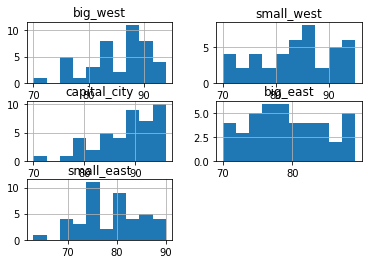

In [ ]:
#membuat histogram
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)
final_exam.hist()
plt.show()

In [19]:
area = ['big_west', 'small_west', 'capital_city', 'small_east', 'big_east']

for a in area:
  z_score = stats.zscore(final_exam[a])
  stat = stats.kstest(z_score, "norm")
  print('stat ', a, ' = ', stat)

stat  big_west  =  KstestResult(statistic=0.1463623852887705, pvalue=0.28678269325815053)
stat  small_west  =  KstestResult(statistic=0.09305748870693209, pvalue=0.8171989638137918)
stat  capital_city  =  KstestResult(statistic=0.1723544820281414, pvalue=0.1379003575286657)
stat  small_east  =  KstestResult(statistic=0.11522951440351409, pvalue=0.5778423663395744)
stat  big_east  =  KstestResult(statistic=0.09709346617838455, pvalue=0.7763472906058266)


Apakah data berdistiribusi normal ? Ya, karena semua p-value > 0.05

## Uji Homogenitas

Ho = varians semua kelompok cenderung homogen

Ha = varians semua kelompok cenderung heterogen

In [ ]:
stats.levene(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

LeveneResult(statistic=0.5104303607286809, pvalue=0.728125042716542)

## Uji ANOVA

Ho =  Kualias pendidiakn merata

ha = kualitas pendidikan tidak merata

In [ ]:
stats.f_oneway(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

F_onewayResult(statistic=18.48895253915249, pvalue=4.945434101915241e-13)

Karena p_value < 0.05, maka Ho ditolak, ternyata kualtias pendidikan tidak merata

In [ ]:
final_exam.describe()

,big_west,small_west,capital_city,big_east,small_east
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,85.325581,83.837209,88.232558,79.209302,78.627907
std,5.982995,7.006562,6.159921,5.667611,6.302015
min,70.000000,70.000000,70.000000,70.000000,63.000000
25%,82.000000,78.500000,85.000000,75.000000,75.000000
50%,87.000000,84.000000,90.000000,78.000000,80.000000
75%,90.000000,89.500000,93.000000,83.000000,83.000000
max,94.000000,95.000000,96.000000,89.000000,90.000000


## Uji Kruskal-Wallis (Non paramterik)

Jika datanya tidak distribusi normal

In [ ]:
stats.kruskal(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'], final_exam['big_east'], final_exam['small_east'])

KruskalResult(statistic=57.244594069662135, pvalue=1.0992920086269013e-11)